# Tutorial
- Train / test on ML-Cup dataset
    - SGD
    - BFGS
    - L-BFGS

- Perform grid search
    - SGD
    - BFGS
    - L-BFGS
- Save and load network parametes

In [1]:
from Validation import *
from time import time
from utils import *
from grid_search import *
from Neural_network import *
from sklearn.preprocessing import normalize, scale

# Monk 1,2,3 with SGD, BFGS and L-BFGS

### Load  Monk dataset

In [2]:
# choose monk dataset
monk = str(1)
columns = ['label', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'id']

# 1. traning set
train_file = "../monk_datasets/monks-" + monk + ".train"
train_data = pd.read_csv(train_file, delim_whitespace=True, header=None)
train_data.columns = columns

# 2. test set
test_file = "../monk_datasets/monks-" + monk + ".test"
test_data = pd.read_csv(test_file, delim_whitespace=True, header=None)
test_data.columns = columns

# 3. getting patterns and labels
encoding = [3, 3, 2, 3, 4, 2]
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6']
X_train, X_test = decode_patterns(encoding, features, train_data, test_data)
Y_train, Y_test = transform_labels(train_data, test_data)

--------------------------------------
# ML-Cup with SGD, BFGS and L-BFGS

### Load ML-Cup dataset

In [2]:
# 1. read file train set
df = pd.read_csv("../Data/MLCup/ML-CUP17-TR_shuffled.csv", comment='#')
#df = pd.read_csv("../Data/MLCup/ML-CUP17-TR.csv", comment='#')
features_col = ["input1","input2","input3","input4","input5",
                "input6","input7", "input8","input9","input10"]
targets_col = ["target_x", "target_y"]

# 2. divide pattern and targets
patterns, labels = divide_patterns_labels(df,features_col,targets_col)

# 3. divide in development set and test set
X_train, Y_train, X_test, Y_test = holdout_cup(patterns, labels, fraction_tr=0.8)

In [15]:
architecture = [10, 5, 2]
neurons = [InputNeuron, TanHNeuron, OutputNeuron]
loss_object = SquaredError()#EuclideanError()
common_network = Network(architecture, neurons)

## SGD - cup

In [16]:
learning_rate = 0.01
momentum = 0.9
lambda_ = 0.05
batch_size = len(X_train)
epsilon = 1e-5
epochs = 10000
network = copy.deepcopy(common_network)

In [17]:
tic = time()
# 5. train
loss_tr_sgd, miss_train, \
loss_ts_sgd, miss_test, norm_gradients_sgd = network.train_SGD(x_train=X_train, 
                                         y_train=Y_train, 
                                         x_test=None,#X_test,
                                         y_test=None,#Y_test,
                                         lossObject=loss_object,
                                         epochs=epochs, 
                                         learning_rate=learning_rate, 
                                         batch_size=batch_size,
                                         momentum=momentum, 
                                        regularization=lambda_, epsilon=epsilon)
toc = time()

stop: norm gradient. Epoch 1591


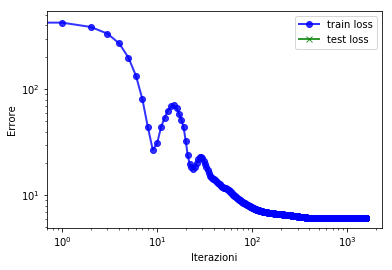

loss train: 6.108900161493226
loss test: None
training time: 208.838008881
norm gradient last: 9.976168865841824e-06
iterazioni: 1592


In [18]:
plot_train_test_learning_curve_loss(loss_ts_sgd, loss_tr_sgd)
print "loss train:", loss_tr_sgd[-1]
print "loss test:", loss_ts_sgd[-1] if len(loss_ts_sgd) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_sgd[-1]
print "iterazioni:", len(loss_tr_sgd)

## BFGS - cup

In [19]:
c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0.05
epsilon = 1e-5
epochs = 10000
network = copy.deepcopy(common_network)

In [20]:
tic = time()
loss_tr_bfgs, miss_tr, \
loss_ts_bfgs, miss_ts, alphas_bfgs, \
norm_gradients_bfgs, cond_bfgs = network.train_BFGS(x_train=X_train,
                                                    y_train=Y_train, 
                                                    x_test=None,#X_test,
                                                    y_test=None,#Y_test,
                                                    theta=theta, c_1=c_1, c_2=c_2, 
                                                    lossObject=loss_object, 
                                                    regularization=lambda_, 
                                                    epochs=epochs, epsilon=epsilon,
                                                    line_search='wolfe', debug=True)
toc = time()

stop: gradient norm, epoch 171


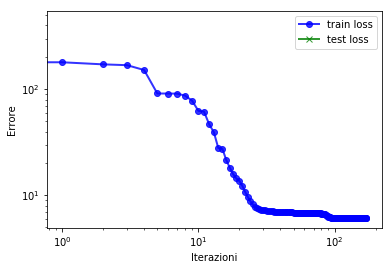

loss train: 6.108900160803207
loss test: None
training time: 62.6288349628
norm gradient last: 7.320443887824298e-06
iterazioni: 172


In [21]:
plot_train_test_learning_curve_loss(loss_ts_bfgs, loss_tr_bfgs)
print "loss train:", loss_tr_bfgs[-1]
print "loss test:", loss_ts_bfgs[-1] if len(loss_ts_bfgs) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_bfgs[-1]
print "iterazioni:", len(loss_tr_bfgs)

## L-BFGS - cup

In [22]:
c_1 = 1e-4
c_2 = 0.9
theta = 0.9
lambda_ = 0.05
epsilon = 1e-5
epochs = 10000
m = 5

network = copy.deepcopy(common_network)

In [24]:
tic = time()
loss_tr_lbfgs, miss_tr, \
loss_ts_lbfgs, miss_ts, alphas_lbfgs, \
norm_gradients_lbfgs, cond_lbfgs = network.train_LBFGS(x_train=X_train,
                                                       y_train=Y_train,
                                                       x_test=None,#X_test, 
                                                       y_test=None,#Y_test,
                                                       theta=theta, 
                                                       c_1=c_1, 
                                                       c_2=c_2, 
                                                       lossObject=loss_object,
                                                       regularization=lambda_, 
                                                       epochs=epochs, 
                                                       epsilon=epsilon, m=m, 
                                                       line_search='wolfe', debug=True)
toc = time()

stop: norm gradient, epoch 287


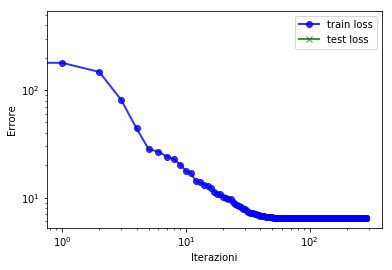

loss train: 6.443776485680031
loss test: None
training time: 83.4764940739
norm gradient last: 7.946976263491343e-06
iterazioni: 288


In [25]:
plot_train_test_learning_curve_loss(loss_ts_lbfgs, loss_tr_lbfgs)
print "loss train:", loss_tr_lbfgs[-1]
print "loss test:", loss_ts_lbfgs[-1] if len(loss_ts_lbfgs) > 0 else None
print "training time:", (toc-tic)
print "norm gradient last:", norm_gradients_lbfgs[-1]
print "iterazioni:", len(loss_tr_lbfgs)

### ML-CUP - optimization plots
- $|| \nabla E(w)||$ vs iterations
- $ |E(w) - E(w^*)| $ vs iterations
- step size $\alpha$ vs iterations (only for BFGS and L-BFGS)

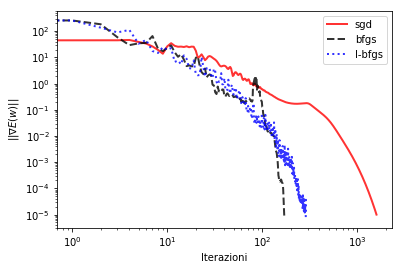

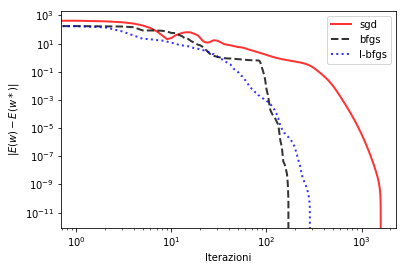

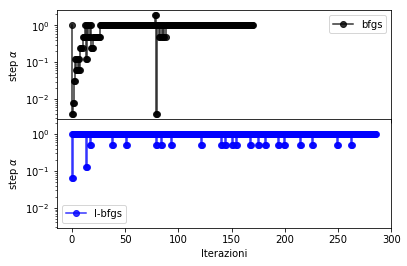

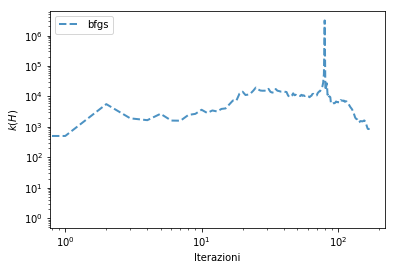

In [26]:
plot_norm_gradient_vs_iterations(norm_gradients_sgd, norm_gradients_bfgs, norm_gradients_lbfgs)
plot_relative_gap_vs_iterations(list(loss_tr_sgd), list(loss_tr_bfgs), list(loss_tr_lbfgs))
plot_alpha_vs_iterations(alphas_bfgs, alphas_lbfgs)
plot_condition_number_vs_iterations(cond_bfgs, cond_lbfgs=None)

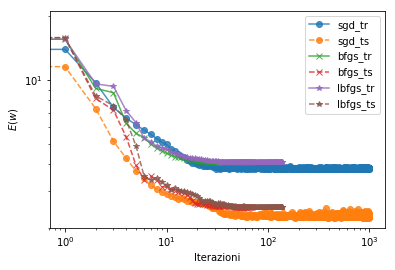

In [44]:
plot_all_loss(loss_tr_sgd, loss_ts_sgd, loss_tr_bfgs, loss_ts_bfgs, loss_tr_lbfgs, loss_ts_lbfgs,\
             xscale='log', yscale='log')

# Grid search

In [ ]:
# directory where to save learning curves
save_directory = './' 
# loss to optimize
loss = SquaredError("tangentH")

In [ ]:
# grid search parameters
grid = GridSearchSGDParams(learning_rate = [0.01, 0.001],
                           momentum = [0.5, 0.9], 
                           batch_size = [16, 32], 
                           architecture = [[17, 10, 1]],
                           neurons = [[InputNeuron, TanHNeuron, TanHNeuron]], 
                           regularization = [0.01, 0.001], 
                           epoch = 5)

# execute grid search
grid_search_SGD(grid, loss, train_patterns, train_labels,
                test_patterns, test_labels, n_trials=1, save_in_dir=save_directory)

In [ ]:
grid = GridSearchBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])         

grid_search_BFGS(grid, loss, train_patterns, train_labels,
                 test_patterns, test_labels, n_trials=2, save_in_dir=save_directory)

In [ ]:
grid = GridSearchLBFGSParams(c_1=[0.0001], 
                            c_2=[0.9], 
                            theta=[0.9], 
                            regularization=[0.001], 
                            epsilon=[0.001, 0.0001],
                            m=[10, 20],
                            epoch=5,
                            architecture = [[17, 10, 1]],
                            neurons = [[InputNeuron, TanHNeuron, TanHNeuron]])

grid_search_LBFGS(grid, loss, train_patterns, train_labels,
                  test_patterns, test_labels,
                  n_trials=5, save_in_dir=save_directory)

## Save & load network parameters

In [ ]:
network = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron])   # random initialized
with open("test_weights.csv", "w") as out_file:
    network.dump_weights(out_file)
    
network_2 = Network([2,5,1], [InputNeuron, TanHNeuron, TanHNeuron]) # random initialized
with open("test_weights.csv", "r") as in_file:
    network_2.load_weights(in_file)
    
network.get_weights_as_vector() == network_2.get_weights_as_vector()

# BFGS vs L-BFGS
varying the parameter $m$ of L-BFGS

In [ ]:
architecture = [17, 5, 5, 1]
neurons = [InputNeuron, TanHNeuron, TanHNeuron, TanHNeuron]
loss_object = SquaredError("tangentH")

c_1 = 1e-4
c_2 = 0.7
theta = 0.7
lambda_ = 0
epsilon = 1e-5
epochs = 200
network_to_copy = Network(architecture, neurons)

In [ ]:
# L-BFGS training
m_values = [1, 3, 5, 7, 9, 11, 13, 15, 17]
time_lbfgs = []
norm_gradient_lbfgs = []
losses_lbfgs = []
iters_lbfgs = []

for m_value in m_values:
    print m_value
    network = copy.deepcopy(network_to_copy)
    tic = time()
    loss_tr, _, _, _, _, norm_gradients, cond = network.train_LBFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon, m=m_value)
    toc = time()
    
    # append results
    time_lbfgs.append(toc-tic)
    norm_gradient_lbfgs.append(norm_gradients)
    losses_lbfgs.append(loss_tr)
    iters_lbfgs.append(len(norm_gradients))

In [ ]:
# BFGS train
network = copy.deepcopy(network_to_copy)
tic = time()
loss_tr_bfgs, _, _, _, _, norm_gradients_bfgs, cond = network.train_BFGS(X_train, Y_train,
                                                        X_test, Y_test,
                                                        theta=theta, 
                                                        c_1=c_1, 
                                                        c_2=c_2, 
                                                        lossObject=loss_object,
                                                        regularization=lambda_, 
                                                        epochs=epochs, 
                                                        epsilon=epsilon)
toc = time()

time_bfgs = toc-tic
iters_bfgs = len(norm_gradients_bfgs)

In [ ]:
# time to reach the norm of the gradient less than epsilon
d = {'m': m_values, 'time': np.round(time_lbfgs,2), 'iters': iters_lbfgs, \
     'loss': [l[-1] for l in losses_lbfgs]}
print 'L-BFGS\n', pd.DataFrame(d, index=m_values)
print 'BFGS time:', round(time_bfgs,2), 'iters:', iters_bfgs, 'loss:', loss_tr_bfgs[-1]

In [ ]:
plt.plot(range(iters_bfgs), norm_gradients_bfgs, label='bfgs', color='black', linewidth=2)
for m, gnorm, iters in zip(m_values, norm_gradient_lbfgs, iters_lbfgs):
    plt.plot(range(iters), gnorm, '--', label='l-bfgs, m='+str(m))
    
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.7),
          ncol=1, fancybox=True, shadow=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Iterazioni')
plt.ylabel(r'$||\nabla E(w)||$')
plt.show()

In [ ]:
plt.plot(range(iters_bfgs), loss_tr_bfgs, label='bfgs', color='black', linewidth=2)
for m, loss, iters in zip(m_values, losses_lbfgs, iters_lbfgs):
    plt.plot(range(iters), loss, '--', label='l-bfgs, m='+str(m))
    
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.7),
          ncol=1, fancybox=True, shadow=True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Iterazioni')
plt.ylabel(r'$E(w)$')
plt.show()